Notebook to provide minimal examples of issues/bugs for gLucifer
=====

Last updated 21 April 2016

Related to this [github ticket](https://github.com/underworldcode/underworld2/issues/87), although many of the issues in that post have already been fixed.

See also the ``gLuciferPubQuality.ipynb`` which is meant to focus more on issues of publication quality figures.

In [23]:
import underworld as uw
import glucifer
import numpy as np


**Make a minimal mesh and mesh variable for testing**

In [3]:
mesh = uw.mesh.FeMesh_Cartesian( elementType = ("Q1/dQ0"), 
                                 elementRes  = (16, 16), 
                                 minCoord    = (0., 0.), 
                                 maxCoord    = (1., 1.))
velocityField = uw.mesh.MeshVariable( mesh=mesh, nodeDofCount=2 )
velocityField.data[...] = (0.0, 1.0)

Example 1: Interactive titles/captions
----

In [11]:
time  = 0.


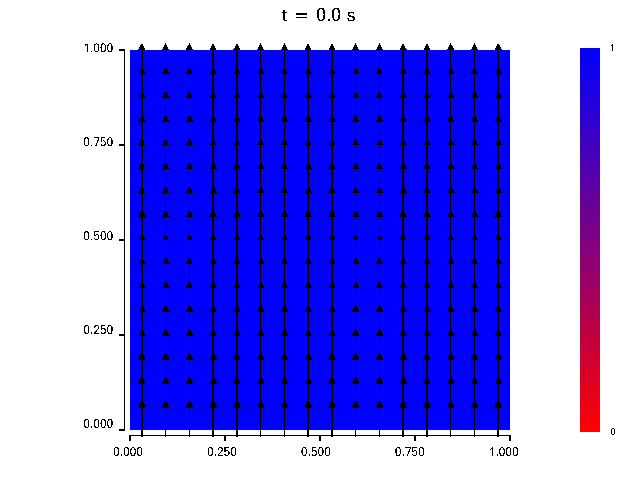

In [12]:
imageTitle = "t = " + str(round(time,1)) + ' s'
propertyList = {"margin" : 50, "rulers" : True, "rulerticks" : 5, "tick3" : 0.0}
fig = glucifer.Figure(title=imageTitle, properties=propertyList)
surf = glucifer.objects.Surface( mesh, velocityField[1], colours="red (0.0)white blue", valueRange=(0., 1.), 
                                logScale=False)
surf.colourBar.properties = {"margin" : 40, "width" : 20, "align" : "right"}
vArrows = glucifer.objects.VectorArrows( mesh, velocityField, arrowHead=0.2, scaling=0.1)
fig.append(vArrows)
fig.append(surf)
fig.show()

Would like to be able to edit the title of figures on the fly. Useful for output from inside loops. Example of what would be nice is commented out below. Currently can't set the attribute.


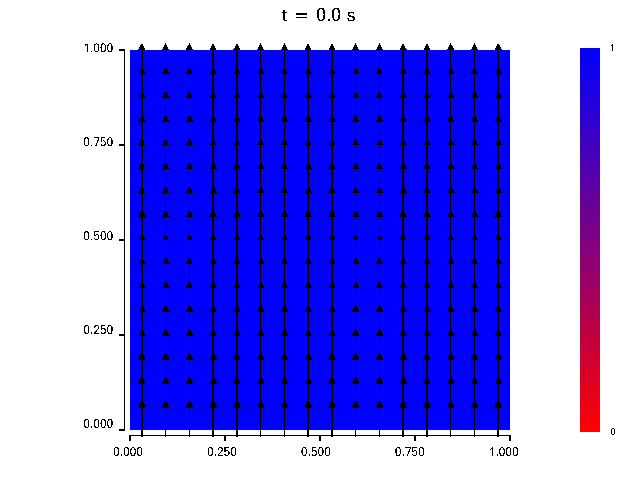

In [17]:
time = 1.
imageTitle = "t = " + str(round(time,1)) + ' s'
#fig.title = imageTitle
fig.show()

``fig.title`` stays the same as we can't edit it directly before replotting or saving to file.

Example 3: Sparse vector arrow data
-----

For example if most of a mesh variable equals zero except a few points. 
Is there any way to just customise where we put the vectors? So we could just have single arrows at those 2 points.


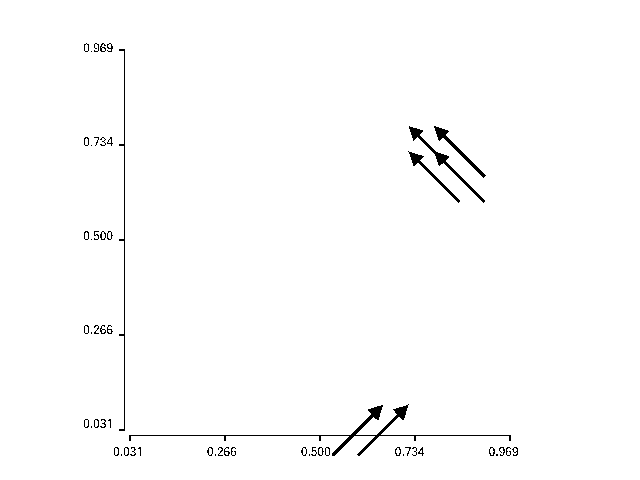

In [55]:
velocityField.data[...] = (0.0, 0.0)
velocityField.data[10] = (0.5, 0.5)
velocityField.data[200] = (-0.5, 0.5)
propertyList = {"margin" : 50, "rulers" : True, "rulerticks" : 5, "tick3" : 0.0}
fig = glucifer.Figure(properties=propertyList)
fig.append(glucifer.objects.VectorArrows( mesh, velocityField, arrowHead=0.2, scaling=1.0))
fig.show()

Example 3: Vector arrow scaling
----

Not really clear how the sizes are set. Why would the default values of $v=1$, scaling=1 be unreadable?

In [51]:
velocityField.data[...] = (0.0, 1.0)


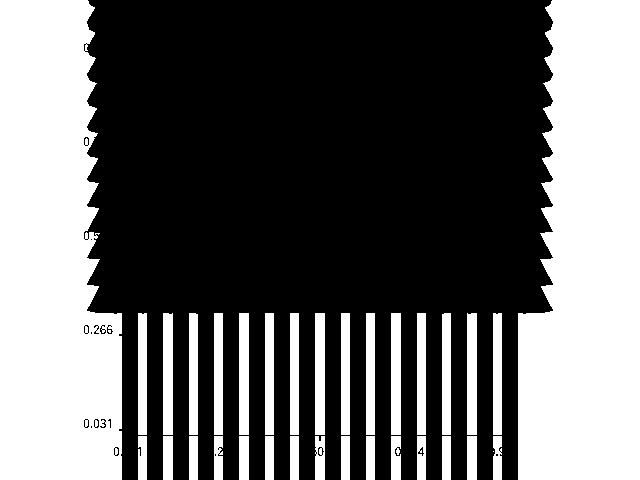

In [45]:
propertyList = {"margin" : 50, "rulers" : True, "rulerticks" : 5, "tick3" : 0.0}
fig = glucifer.Figure(properties=propertyList)
vArrows = glucifer.objects.VectorArrows( mesh, velocityField, arrowHead=0.2, scaling=1.0)
fig.append(vArrows)
fig.show()


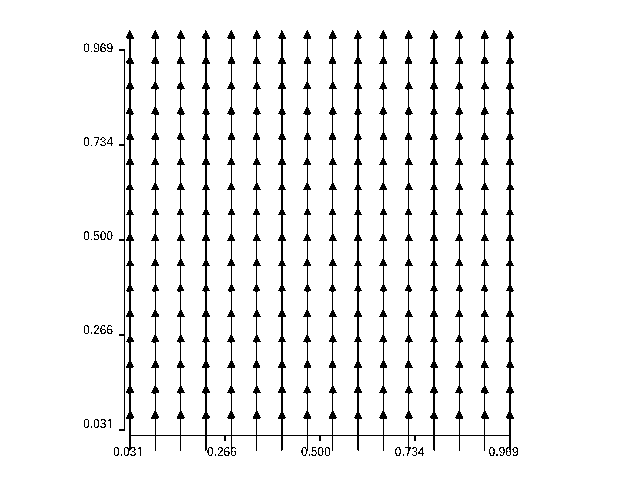

In [46]:
velocityField.data[...] = (0.0, 0.10)
fig.show()


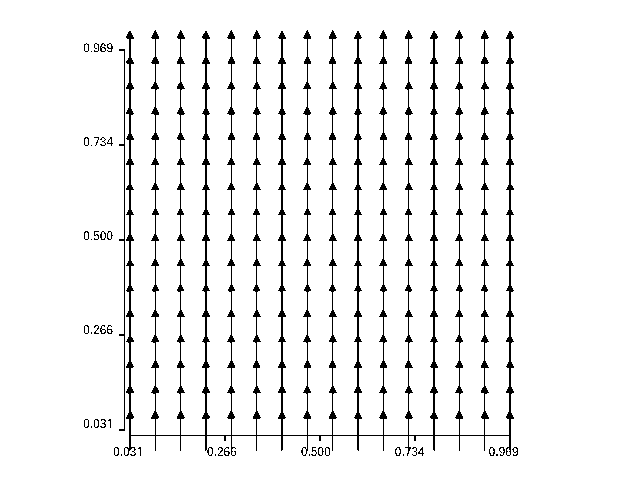

In [47]:
velocityField.data[...] = (0.0, 1.0)
propertyList = {"margin" : 50, "rulers" : True, "rulerticks" : 5, "tick3" : 0.0}
fig = glucifer.Figure(properties=propertyList)
vArrows = glucifer.objects.VectorArrows( mesh, velocityField, arrowHead=0.2, scaling=0.10)
fig.append(vArrows)
fig.show()

Also why can't the bounding box be set as 0 to 1? The arrows are from the mid points but the data for the field is defined from 0 to 1 in both dimensions.